In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV test data separetly into a DataFrame
data1 = pd.read_csv('results/aigenerated_2_oneshot_experiment_1689709380000.csv')
data2 = pd.read_csv('results/2_aigenerated_2_oneshot_experiment_1690119876211.csv')
# Concatenate the two test data
df = pd.concat([data1, data2], ignore_index=True)
df

,llm_model,temperature,system_prompt,user_prompt,score
0,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 0,3.0
1,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 1,3.0
2,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 2,3.0
3,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 3,3.0
4,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,CONVERT_TEXT_TO_SPEECH.txt - 4,3.0
...,...,...,...,...,...
637,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,SEND_EMAIL.txt - 15,3.0
638,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,SEND_EMAIL.txt - 16,3.0
639,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,SEND_EMAIL.txt - 17,3.0
640,openai/gpt-4-0613,0,aigenerated_2_oneshot.txt,SEND_EMAIL.txt - 18,3.0


In [10]:
data1.head

<bound method NDFrame.head of              llm_model  temperature              system_prompt   
0    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt  \
1    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
2    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
3    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
4    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
..                 ...          ...                        ...   
316  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
317  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
318  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
319  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
320  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0      3  
1    CONVERT_TEXT_TO_SPEECH.txt - 1      3  
2    CONVERT_TEXT_TO_SPEECH.txt - 2      3

In [11]:
data2.head

<bound method NDFrame.head of              llm_model  temperature              system_prompt   
0    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt  \
1    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
2    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
3    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
4    openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
..                 ...          ...                        ...   
316  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
317  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
318  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
319  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   
320  openai/gpt-4-0613            0  aigenerated_2_oneshot.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0    3.0  
1    CONVERT_TEXT_TO_SPEECH.txt - 1    3.0  
2    CONVERT_TEXT_TO_SPEECH.txt - 2    3.0

In [12]:
# filter and clean the data by excluding unwanted columns
df['user_prompt'] = df['user_prompt'].str.split('.').str[0]
filtered_df = df[['user_prompt', 'score']]
filtered_df

,user_prompt,score
0,CONVERT_TEXT_TO_SPEECH,3.0
1,CONVERT_TEXT_TO_SPEECH,3.0
2,CONVERT_TEXT_TO_SPEECH,3.0
3,CONVERT_TEXT_TO_SPEECH,3.0
4,CONVERT_TEXT_TO_SPEECH,3.0
...,...,...
637,SEND_EMAIL,3.0
638,SEND_EMAIL,3.0
639,SEND_EMAIL,3.0
640,SEND_EMAIL,3.0


In [13]:
# Identify the unique scores
unique_scores = [0, 1, 2, 3]  # the score is to confusion matrix as TP=3, FP=2, FN=1 and TN=0.

# Count the occurrences of each score for each user_prompt
summary_aigen2_oneshot = df.groupby('user_prompt')['score'].value_counts().unstack()

# Ensure all scores are represented in the columns, filling with 0 where necessary
summary_aigen2_oneshot = summary_aigen2_oneshot.reindex(columns=unique_scores).fillna(0)

# Rename the columns as desired (cnfusion matrix)
summary_aigen2_oneshot.columns = ['TN', 'FN', 'FP', 'TP']
summary_aigen2_oneshot


,TN,FN,FP,TP
user_prompt,,,,
CONVERT_TEXT_TO_SPEECH,0.0,0.0,1.0,39.0
CREATE_CALENDAR_EVENT,0.0,11.0,10.0,19.0
CREATE_REMINDER,0.0,2.0,1.0,37.0
GENERATE_IMAGE,2.0,6.0,6.0,26.0
GET_CALENDAR_EVENTS,8.0,2.0,4.0,26.0
GET_CURRENT_DATE_AND_TIME,0.0,0.0,0.0,39.0
GET_CURRENT_STOCK_PRICE,0.0,0.0,0.0,40.0
GET_NEWS,0.0,0.0,0.0,40.0
GET_WEATHER,0.0,0.0,0.0,40.0


In [19]:
# Calculate Precision, Recall, and F1 Score
summary_aigen2_oneshot['Precision'] = summary_aigen2_oneshot['TP'] / (summary_aigen2_oneshot['TP'] + summary_aigen2_oneshot['FP'])
summary_aigen2_oneshot['Recall'] = summary_aigen2_oneshot['TP'] / (summary_aigen2_oneshot['TP'] + summary_aigen2_oneshot['FN'])
summary_aigen2_oneshot['F1 Score'] = 2 * (summary_aigen2_oneshot['Precision'] * summary_aigen2_oneshot['Recall']) / (summary_aigen2_oneshot['Precision'] + summary_aigen2_oneshot['Recall'])

# Round to 2 decimal places
summary_aigen2_oneshot['Precision'] = summary_aigen2_oneshot['Precision'].round(2)
summary_aigen2_oneshot['Recall'] = summary_aigen2_oneshot['Recall'].round(2)
summary_aigen2_oneshot['F1 Score'] = summary_aigen2_oneshot['F1 Score'].round(2)

# Handle possible NaN values (caused by divisions by zero)
summary_aigen2_oneshot.fillna(0, inplace=True)

# Stire the results summary in a csv file
summary_aigen2_oneshot.to_csv('summary_aigen2_oneshot.csv', index=True)

print(summary_aigen2_oneshot)

                            TN  FN  FP   TP  Precision  Recall  F1 Score
user_prompt                                                             
CONVERT_TEXT_TO_SPEECH       0   0   1   39       0.98    1.00      0.99
CREATE_CALENDAR_EVENT        0  11  10   19       0.66    0.63      0.64
CREATE_REMINDER              0   2   1   37       0.97    0.95      0.96
GENERATE_IMAGE               2   6   6   26       0.81    0.81      0.81
GET_CALENDAR_EVENTS          8   2   4   26       0.87    0.93      0.90
GET_CURRENT_DATE_AND_TIME    0   0   0   39       1.00    1.00      1.00
GET_CURRENT_STOCK_PRICE      0   0   0   40       1.00    1.00      1.00
GET_NEWS                     0   0   0   40       1.00    1.00      1.00
GET_WEATHER                  0   0   0   40       1.00    1.00      1.00
NOT_AVAILABLE              107   1  11  123       0.92    0.99      0.95
SEND_EMAIL                   2   2   0   36       1.00    0.95      0.97


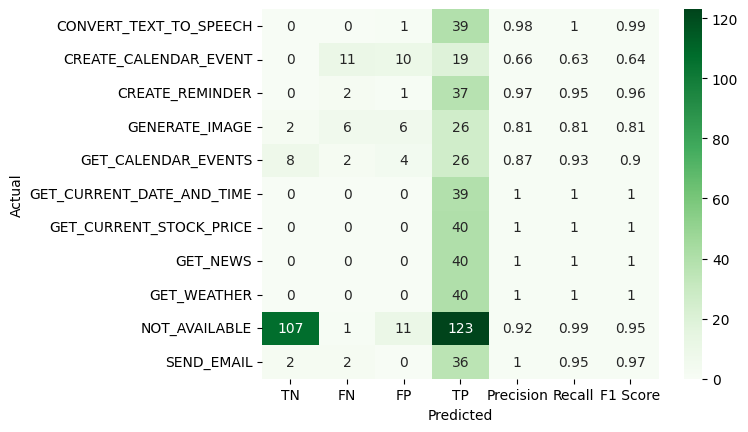

In [15]:
# Plot the confusion matrix
sns.heatmap(summary_aigen2_oneshot, annot=True, cmap='Greens', fmt='g'), plt.xlabel('Predicted'), plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
# Generate the DataFrame to LaTeX format so that it can be copied and pasted into our thesis
# Formatting TN, FN, FP, and TP columns to 0 decimal places
for col in ['TN', 'FN', 'FP', 'TP']:
    summary_aigen2_oneshot[col] = summary_aigen2_oneshot[col].astype(int)

# Formatting the 'Precision', 'Recall', and 'F1 Score' columns to 2 decimal places
for col in ['Precision', 'Recall', 'F1 Score']:
    summary_aigen2_oneshot[col] = summary_aigen2_oneshot[col].round(2)

# Convert the DataFrame to LaTeX
latex_code = summary_aigen2_oneshot.to_latex(float_format="%.2f")
print(latex_code)

\begin{tabular}{lrrrrrrr}
\toprule
 & TN & FN & FP & TP & Precision & Recall & F1 Score \\
user_prompt &  &  &  &  &  &  &  \\
\midrule
CONVERT_TEXT_TO_SPEECH & 0 & 0 & 1 & 39 & 0.98 & 1.00 & 0.99 \\
CREATE_CALENDAR_EVENT & 0 & 11 & 10 & 19 & 0.66 & 0.63 & 0.64 \\
CREATE_REMINDER & 0 & 2 & 1 & 37 & 0.97 & 0.95 & 0.96 \\
GENERATE_IMAGE & 2 & 6 & 6 & 26 & 0.81 & 0.81 & 0.81 \\
GET_CALENDAR_EVENTS & 8 & 2 & 4 & 26 & 0.87 & 0.93 & 0.90 \\
GET_CURRENT_DATE_AND_TIME & 0 & 0 & 0 & 39 & 1.00 & 1.00 & 1.00 \\
GET_CURRENT_STOCK_PRICE & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
GET_NEWS & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
GET_WEATHER & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
NOT_AVAILABLE & 107 & 1 & 11 & 123 & 0.92 & 0.99 & 0.95 \\
SEND_EMAIL & 2 & 2 & 0 & 36 & 1.00 & 0.95 & 0.97 \\
\bottomrule
\end{tabular}

